# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [ ]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


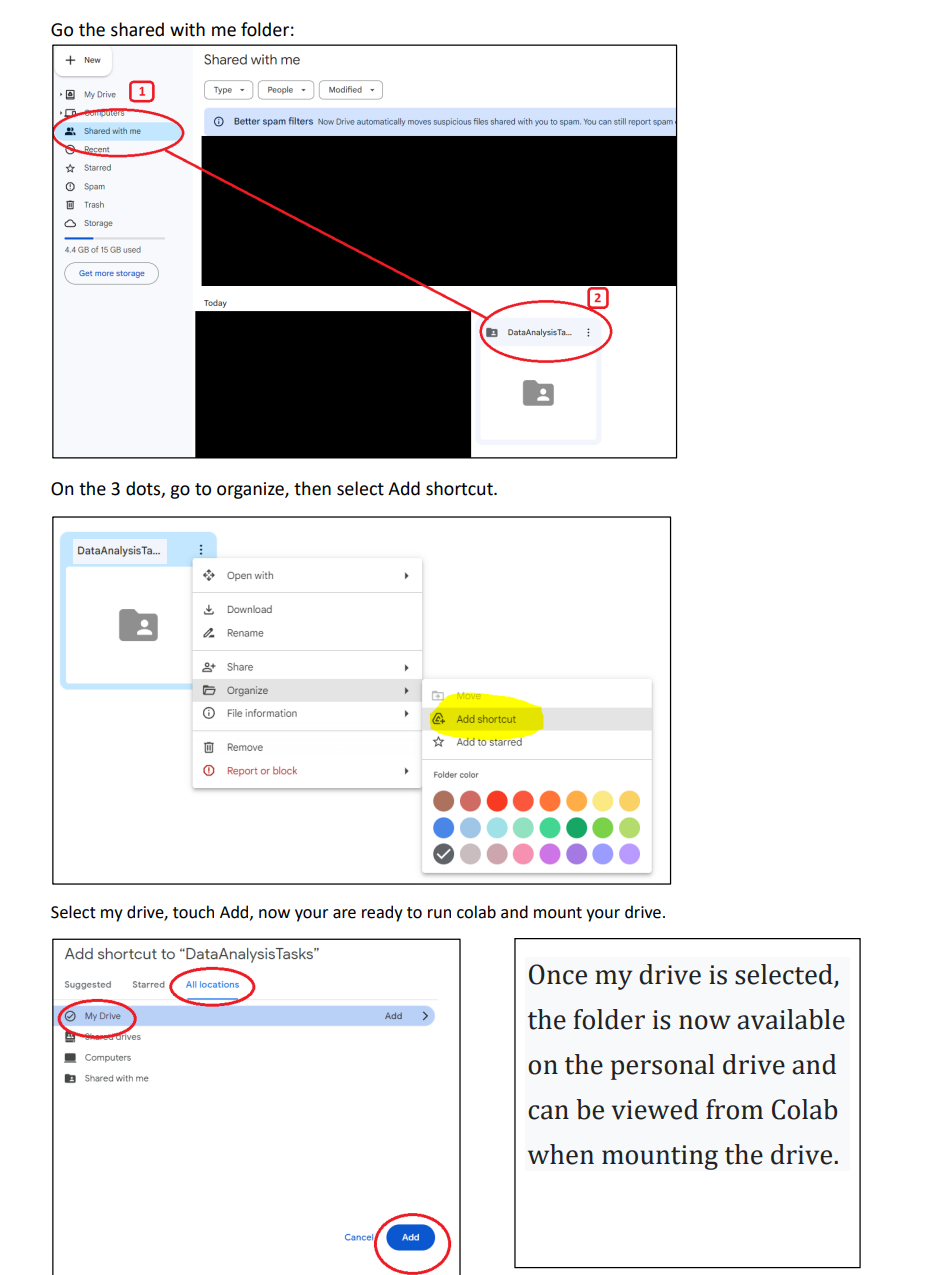

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/vehicle_insurance_claim_fraud_detection.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [ ]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [27]:
# Import necessary libraries
import pandas as pd
from bokeh.models import ColorBar, LogColorMapper
from bokeh.palettes import Viridis256
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.sampledata.us_states import data as states

# Dictionary with average age for each state
average_age = dict(
    AL= 35.3, AK= 27.7, AZ= 38.5, AR= 38.6, CA= 37.3, CO= 37.3, CT= 41.2, DE= 41.4, DC= 34.4, FL= 42.7,
    GA= 37.3, HI= 40.0, ID= 37.2, IL= 38.8, IN= 38.0, IA= 38.6, KS= 37.3, KY= 39.2, LA= 37.8, ME= 45.0,
    MD= 39.2, MA= 39.7, MI= 40.1, MN= 38.5, MS= 38.3, MO= 39.1, MT= 40.2, NE= 36.9, NV=38.5, NH= 43.1,
    NJ= 40.2, NM= 38.6, NY= 39.4, NC= 39.2, ND= 35.4, OH= 39.6, OK= 37.1, OR= 39.9, PA= 40.0, RI= 40.3,
    SC= 40.1, SD= 37.6, TN= 35.1, TX= 35.2, UT= 31.5, VT= 43.0, VA= 38.7, WA= 37.9, WV= 43.0, WI= 40.0,
    WY= 38.7,
)

# Convert the states data into a DataFrame and exclude Alaska and Hawaii
df = pd.DataFrame(states).T
df = df[~df["name"].isin(['Alaska', "Hawaii"])]
df["lons"] = df.lons.values.tolist()
df["lats"] = df.lats.values.tolist()
df = df.reset_index()

# Add the age data to the DataFrame
df['index'] = df['index'].map(average_age)
df.rename(columns = {'index':'age'}, inplace = True)

# Create a dictionary as a data source for the plot
datasource = {}
datasource["lons"] = df.lons.values.tolist()
datasource["lats"] = df.lats.values.tolist()
datasource["state"] = df.name.values.tolist()
datasource["age"] = df.age.values.tolist()

# Output to notebook
output_notebook()

# Create a figure with tooltips
p = figure(
      width=900,
      height=600,
      title="Average Age Per State Choropleth Map",
      y_axis_location=None,
      tooltips=[("State", "@state"), ("Average Age", "@age")],
      tools="hover, copy, box_zoom, pan, reset",
    )

# Remove grid lines
p.grid.grid_line_color = None

# Create a color mapper
color_mapper = LogColorMapper(palette=Viridis256[::-1])

# Add patches to the figure
p.patches(
    "lons",
    "lats",
    source=datasource,
    fill_color={'field': 'age', 'transform': color_mapper},
    fill_alpha=0.7,
    line_color="white",
    line_width=0.5
  )

# Add a color bar
p.add_layout(
    ColorBar(
      color_mapper=color_mapper,
      location="bottom_right",
      orientation="vertical",
      height=200,
    ),
    "center"
  )

# Show the map
show(p)
